In [40]:
# import libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# load the dataloader
from torch.utils.data import DataLoader

In [41]:
# Import the Iris dataset using seaborn
import seaborn as sns

# Load the Iris dataset into a pandas DataFrame
iris = sns.load_dataset('iris')


In [42]:
# Organize the data

# Convert data from a pandas DataFrame to a PyTorch tensor
data = torch.tensor(iris[iris.columns[0:4]].values).float()

# Transform species labels to numerical values
labels = torch.zeros(len(data), dtype=torch.long)

# Set numerical values for species labels
labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2


# Break the data into batches

In [43]:
# Split the data into training and testing sets

# Use scikit-learn to split the data
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2)

# Convert the split data into PyTorch Datasets (already converted to tensors)

# Create a PyTorch TensorDataset for training data and labels
train_dataDataset = torch.utils.data.TensorDataset(train_data, train_labels)

# Create a PyTorch TensorDataset for test data and labels
test_dataDataset = torch.utils.data.TensorDataset(test_data, test_labels)

# Create DataLoader objects for efficient data handling during training and testing

# Create a DataLoader for training data with a batch size of 64, shuffling the data, and dropping the last batch if it's incomplete
train_loader = DataLoader(train_dataDataset, batch_size=64, shuffle=True, drop_last=True)

# Create a DataLoader for test data with a batch size equal to the size of the test dataset
test_loader = DataLoader(test_dataDataset, batch_size=test_dataDataset.tensors[0].shape[0])


# the model

In [44]:
# A function that creates an Artificial Neural Network (ANN) model

def createANewModel(L2lambda):

  # Define the architecture of the ANN model

  # Create an instance of nn.Sequential to define a sequential neural network model
  ANNiris = nn.Sequential(
      nn.Linear(4, 64),    # Input layer with 4 input features and 64 output units
      nn.ReLU(),           # ReLU (Rectified Linear Unit) activation function
      nn.Dropout(p=0.15),    # 15% dropout
      
      nn.Linear(64, 64),   # Hidden layer with 64 input units and 64 output units
      nn.ReLU(),           # ReLU activation function
      nn.Dropout(p=0.15),    # 15% dropout
      
      nn.Linear(64, 64),   # Hidden layer with 64 input units and 64 output units
      nn.ReLU(),           # ReLU activation function
      nn.Dropout(p=0.15),    # 15% dropout

      nn.Linear(64, 64),   # Hidden layer with 64 input units and 64 output units
      nn.ReLU(),           # ReLU activation function
      nn.Dropout(p=0.15),    # 15% dropout
      
      nn.Linear(64, 3)     # Output layer with 64 input units and 3 output units (for classification)
  )

  # Define the loss function

  # Use CrossEntropyLoss for multi-class classification problems
  lossfun = nn.CrossEntropyLoss()

  # Define the optimizer

  # Use Stochastic Gradient Descent (SGD) optimizer to update model parameters
  # Set the learning rate to 0.005 and apply L2 regularization with the specified lambda (L2lambda)
  optimizer = torch.optim.SGD(ANNiris.parameters(), lr=0.005, weight_decay=L2lambda)

  # Return the created ANN model, loss function, and optimizer
  return ANNiris, lossfun, optimizer


In [45]:
# Train the model

# Global parameter: number of epochs
numepochs = 2000

def trainTheModel():

  # Initialize lists to store training accuracies, test accuracies, and losses
  trainAcc = []
  testAcc = []
  losses = []

  # Loop over training epochs
  for epochi in range(numepochs):

    # Loop over training data batches
    batchAcc = []  # List to store batch accuracies
    batchLoss = []  # List to store batch losses
    for X, y in train_loader:

      # Forward pass and compute the loss
      yHat = ANNiris(X)  # Obtain model predictions
      loss = lossfun(yHat, y)  # Compute the loss using the specified loss function
      
      # Backpropagation: zero gradients, compute gradients, and update model weights
      optimizer.zero_grad()  # Zero out the gradients
      loss.backward()  # Compute gradients using backpropagation
      optimizer.step()  # Update model weights based on gradients

      # Compute training accuracy for this batch
      batchAcc.append(100 * torch.mean((torch.argmax(yHat, axis=1) == y).float()).item())
      batchLoss.append(loss.item())  # Append the batch loss to the list
    # End of batch loop...

    # Calculate and store the average training accuracy and loss for this epoch
    trainAcc.append(np.mean(batchAcc))
    losses.append(np.mean(batchLoss))

    # Evaluate the model on the test data to compute test accuracy
    ANNiris.eval()  # Set the model to evaluation mode
    X, y = next(iter(test_loader))  # Extract a batch of test data
    predlabels = torch.argmax(ANNiris(X), axis=1)  # Get predicted labels
    testAcc.append(100 * torch.mean((predlabels == y).float()).item())  # Compute and store test accuracy

    # Reset the model to training mode
    ANNiris.train()

  # Function output: training accuracies, test accuracies, and losses
  return trainAcc, testAcc, losses


In [46]:
# Create a model

# Regularization parameter (L2 lambda)
L2lambda = .01

# Create a new neural network model using the function createANewModel
# This function returns the model (ANNiris), loss function (lossfun), and optimizer
ANNiris, lossfun, optimizer = createANewModel(L2lambda)

# Train the model

# Initialize lists to store training accuracies, test accuracies, and losses
trainAcc = []
testAcc = []
losses = []

# Loop over training epochs
for epochi in range(numepochs):

    # Loop over training data batches
    batchAcc = []  # List to store batch accuracies
    batchLoss = []  # List to store batch losses
    for X, y in train_loader:

        # Forward pass and compute the loss
        yHat = ANNiris(X)  # Obtain model predictions
        loss = lossfun(yHat, y)  # Compute the loss using the specified loss function
      
        # Backpropagation: zero gradients, compute gradients, and update model weights
        optimizer.zero_grad()  # Zero out the gradients
        loss.backward()  # Compute gradients using backpropagation
        optimizer.step()  # Update model weights based on gradients

        # Compute training accuracy for this batch
        batchAcc.append(100 * torch.mean((torch.argmax(yHat, axis=1) == y).float()).item())
        batchLoss.append(loss.item())  # Append the batch loss to the list

    # End of batch loop...

    # Calculate and store the average training accuracy and loss for this epoch
    trainAcc.append(np.mean(batchAcc))
    losses.append(np.mean(batchLoss))

    # Evaluate the model on the test data to compute test accuracy
    ANNiris.eval()  # Set the model to evaluation mode
    X, y = next(iter(test_loader))  # Extract a batch of test data
    predlabels = torch.argmax(ANNiris(X), axis=1)  # Get predicted labels
    testAcc.append(100 * torch.mean((predlabels == y).float()).item())  # Compute and store test accuracy

    # Reset the model to training mode
    ANNiris.train()

# Function output: training accuracies, test accuracies, and losses


<>:10: SyntaxWarning: invalid escape sequence '\l'
<>:15: SyntaxWarning: invalid escape sequence '\l'
<>:10: SyntaxWarning: invalid escape sequence '\l'
<>:15: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_3257/2347071835.py:10: SyntaxWarning: invalid escape sequence '\l'
  ax[0].set_title('Losses with L2 $\lambda$=' + str(L2lambda))  # Set the title
/tmp/ipykernel_3257/2347071835.py:15: SyntaxWarning: invalid escape sequence '\l'
  ax[1].set_title('Accuracy with L2 $\lambda$=' + str(L2lambda))  # Set the title


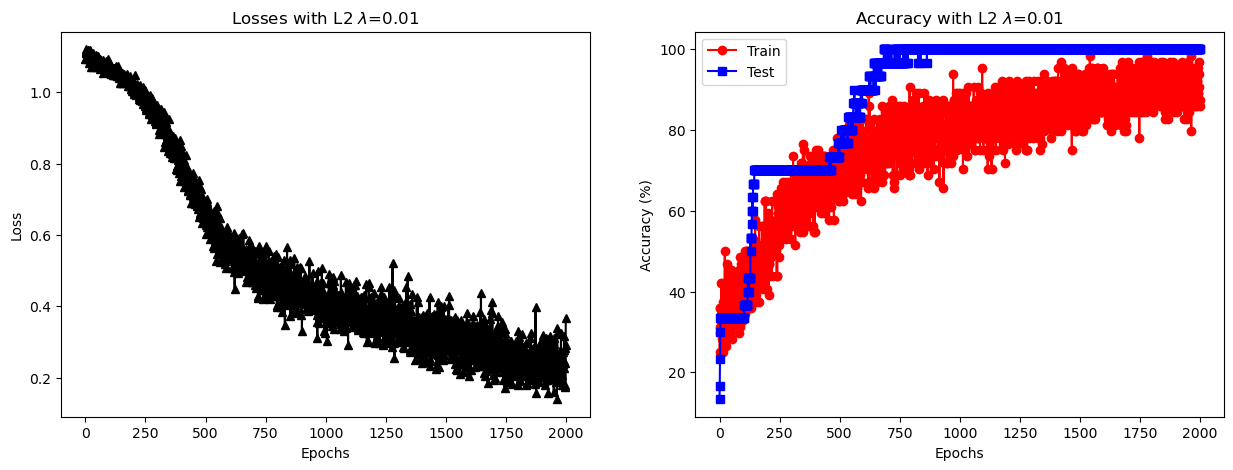

In [47]:
# Plot the results

# Create a figure with two subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot the training losses on the first subplot (left)
ax[0].plot(losses, 'k^-')  # Plot losses as black triangles
ax[0].set_ylabel('Loss')  # Set the y-axis label to 'Loss'
ax[0].set_xlabel('Epochs')  # Set the x-axis label to 'Epochs'
ax[0].set_title('Losses with L2 $\lambda$=' + str(L2lambda))  # Set the title

# Plot the training and test accuracies on the second subplot (right)
ax[1].plot(trainAcc, 'ro-')  # Plot training accuracies as red circles
ax[1].plot(testAcc, 'bs-')  # Plot test accuracies as blue squares
ax[1].set_title('Accuracy with L2 $\lambda$=' + str(L2lambda))  # Set the title
ax[1].set_xlabel('Epochs')  # Set the x-axis label to 'Epochs'
ax[1].set_ylabel('Accuracy (%)')  # Set the y-axis label to 'Accuracy (%)'
ax[1].legend(['Train', 'Test'])  # Add a legend with labels 'Train' and 'Test'

# Show the plot
plt.show()


In [48]:
# Create a 1D smoothing filter
def smooth(x, k):
    # Use np.convolve to apply a smoothing filter to the input data 'x'
    # np.ones(k) creates a filter with all elements set to 1, representing the weights of the filter.
    # / k divides each element of the filter by 'k', which averages the values in the filter window.
    # 'mode='same'' ensures the output has the same length as the input data 'x'.
    return np.convolve(x, np.ones(k) / k, mode='same')


# The experiment

In [49]:
# Define a range of L2 regularization amounts
l2lambdas = np.linspace(0, 0.1, 10)

# Initialize output results matrices for training and testing accuracies
accuracyResultsTrain = np.zeros((numepochs, len(l2lambdas)))
accuracyResultsTest  = np.zeros((numepochs, len(l2lambdas)))

# Loop over different L2 regularization values
for li in range(len(l2lambdas)):

    # Create and train a model with the current L2 regularization value
    ANNiris, lossfun, optimizer = createANewModel(l2lambdas[li])
    trainAcc, testAcc, losses = trainTheModel()

    # Store the smoothed training and testing accuracies in the respective result matrices
    accuracyResultsTrain[:, li] = smooth(trainAcc, 10)
    accuracyResultsTest[:, li]  = smooth(testAcc, 10)


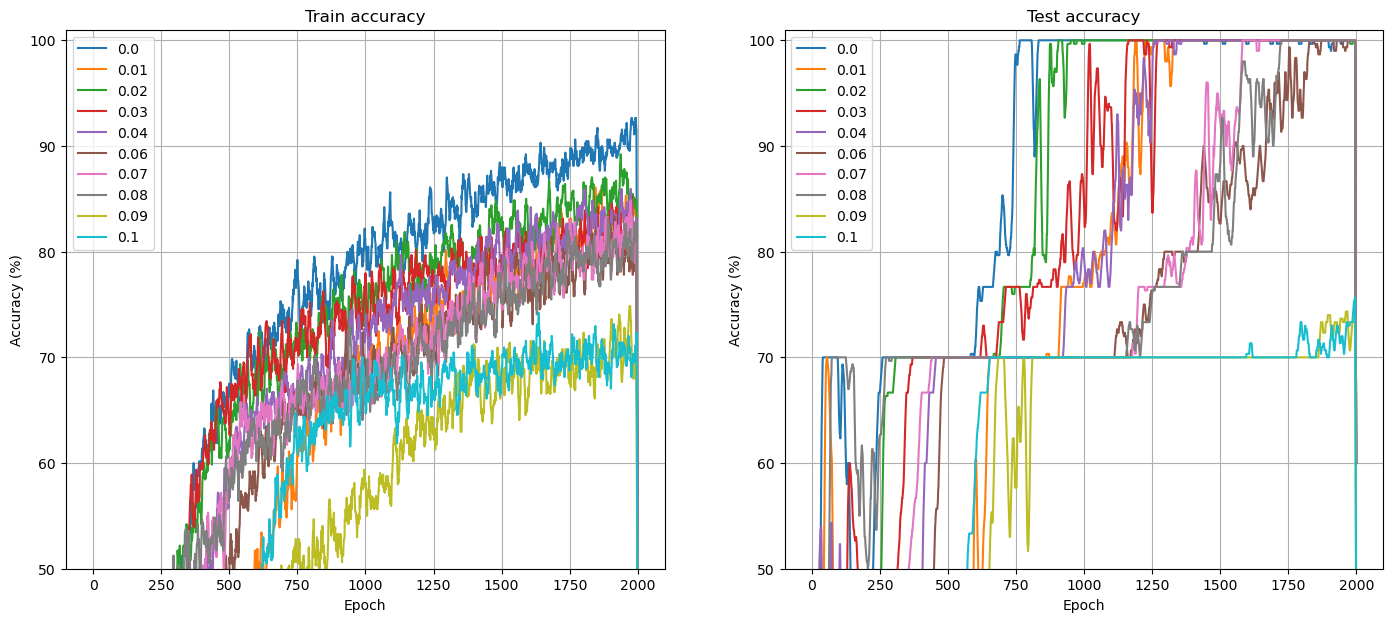

In [50]:
# Create subplots for displaying training and testing accuracy
fig, ax = plt.subplots(1, 2, figsize=(17, 7))

# Plot training accuracy
ax[0].plot(accuracyResultsTrain)
ax[0].set_title('Train accuracy')

# Plot testing accuracy
ax[1].plot(accuracyResultsTest)
ax[1].set_title('Test accuracy')

# Create labels for the legend based on L2 regularization strengths
leglabels = [np.round(i, 2) for i in l2lambdas]

# Common features for both subplots
for i in range(2):
    ax[i].legend(leglabels)          # Add legend with L2 regularization strengths
    ax[i].set_xlabel('Epoch')        # Label the x-axis as "Epoch"
    ax[i].set_ylabel('Accuracy (%)') # Label the y-axis as "Accuracy (%)"
    ax[i].set_ylim([50, 101])       # Set y-axis limit to range from 50 to 100 (percentage scale)
    ax[i].grid()                     # Add gridlines to the plot

plt.show()


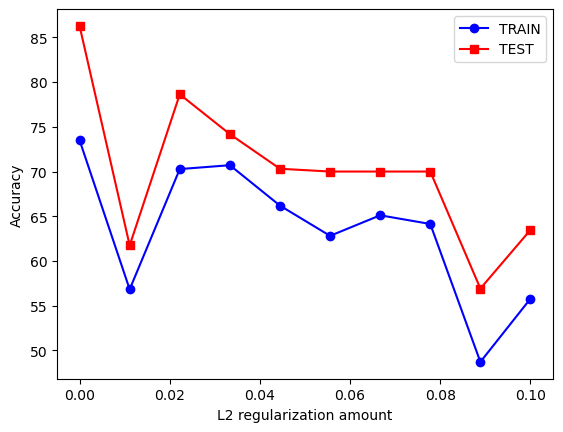

In [51]:
# Specify the range of epochs for which to calculate average accuracy
epoch_range = [500, 950]

# Plot the average accuracy by L2 regularization rate for training data
plt.plot(
    l2lambdas,
    np.mean(accuracyResultsTrain[epoch_range[0]:epoch_range[1], :], axis=0),
    'bo-',  # Blue circles with solid lines
    label='TRAIN'  # Label for the training data
)

# Plot the average accuracy by L2 regularization rate for testing data
plt.plot(
    l2lambdas,
    np.mean(accuracyResultsTest[epoch_range[0]:epoch_range[1], :], axis=0),
    'rs-',  # Red squares with solid lines
    label='TEST'  # Label for the testing data
)

# Set x-axis label
plt.xlabel('L2 regularization amount')

# Set y-axis label
plt.ylabel('Accuracy')

# Add a legend to distinguish between training and testing data
plt.legend()

# Display the plot
plt.show()


# Additional explorations

In [52]:
# 1) In general, regularization tends to benefit large, complex models, and has less impact (and sometimes even a negative
#    impact) on smaller or simpler model architectures. Modify the model architecture to have three hidden layers, and
#    see whether that changes the effect of L2 regularization on performance. (You might want to increase the number of 
#    epochs.)
# 
# 2) Multiple regularization methods can be combined. Add 15% dropout to the hidden layer(s) and see how that affects
#    the model's performance. 
# 